## 引入：mean estimation

该算法的目的是通过“采样”估计expectation

$w_{k+1}^{} = \frac{1}{k} \sum_{i=1}^{k} x_{i} , \ \ \ \  k=1,2,...$

$w_{k+1}$ ：下标是k+1，但这个是前k个元素的均值

这个是定义式，已知一系列随机变量$X$的采样，求**mean estimation**，估计其expectation

$RM:\  g(w)=0$

$SGD:\  g'(w)=0$

#### 一、定义式：直接求平均

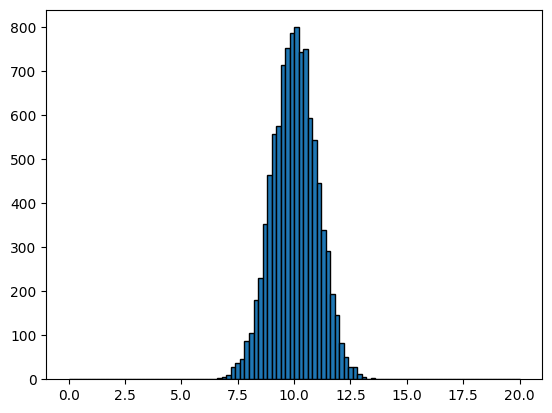

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**3-5
x = np.random.normal(10, 1, 10000) # 均值，方差，个数，正态分布

plt.hist(x, bins=100, range=(0, 20), edgecolor='black')
plt.show()

In [11]:
f(x).mean() #直接求平均

1028.7527108776571

#### 二、迭代式
$w_{k+1}^{} = \frac{1}{k} \sum_{i=1}^{k} x_{i} ,\ \ \ \  k=1,2,...$

$w_{k}^{} = \frac{1}{k-1} \sum_{i=1}^{k-1} x_{i} ,\ \ \ \  k=2,3,...$

$w_{k+1}^{} = \frac{1}{k} \sum_{i=1}^{k} = \frac{1}{k}(\sum_{i=1}^{k-1} x_{i} +  x_{k})=\frac{1}{k}((k-1)w_{k} + x_{k})=w_{k} - \frac{1}{k}(w_{k}-x_{k})$

$k=0 \ \ w_{1}= 0$

$k=1 \ \ w_{2}= \frac{1}{1} * f(x1) =  0 - \frac{1}{1}(0 - f(x_{1})) = w_{1} - \frac{1}{1}(w_{1} - f(x_{1}))$

$k=2 \ \ w_{3}= \frac{1}{2} * [f(x1)+f(x2)] = w_{2} - \frac{1}{2}(w_{2} - f(x_{2}))$

In [12]:
w = 0  #w1
for k in range(1,10000):
    w = w - 1/k*(w-f(x[k-1]))  #数组下标是从0开始的，所以记得-1
    # print(w)
print(w)

1028.756908821687


In [13]:
w = 0  #w1
for k in range(1,10000):
    w = w - 1/(k+20)*(w-f(x[k-1]))  #实际上k+什么常数最终都能收敛
    # print(w)
print(w)

1026.7032968667506


In [14]:
w = 0  #w1
for k in range(1,10000):
    w = w - 1/1000*(w-f(x[k-1]))  #实际上k+什么常数最终都能收敛
    # print(w)
print(w)

1031.4132069801144


## Robbins-Monro

下面是三个RM算法的例子

$w_{k+1} = w_{k} - a_{k}\widetilde{g} (w_{k},\eta_{k}),\ \ \ \ k=1,2,3...$

$f(x) = x - 10$

In [ ]:
f = lambda x: x-10   #f(x) = x-10

w = 1000
a = 0.5
tmp = []
for i in range(65535):
    # w = w - 1/(i+1) * f(w)
    w = w - a * f(w)  # Robbins-Monro algorithm
    tmp.append(w)
print(w)
print(tmp[:20])

10.0
[505.0, 257.5, 133.75, 71.875, 40.9375, 25.46875, 17.734375, 13.8671875, 11.93359375, 10.966796875, 10.4833984375, 10.24169921875, 10.120849609375, 10.0604248046875, 10.03021240234375, 10.015106201171875, 10.007553100585938, 10.003776550292969, 10.001888275146484, 10.000944137573242]


$f(x) = x^{3} - 5$

In [16]:
f = lambda x: x**3-5   #f(x) = x^3-5

w = 1.7   # 注意，这里方程的梯度是二次方，无上界，所以对初始取值很苛刻，不然极其容易无法收敛，如果w太大就无法收敛
tmp = []
for i in range(65535):
    w = w - 1/(i+1) * f(w)  
    # w = w - 0.5 * f(w)  
    tmp.append(w)
print(w)
print(tmp[:20])

1.7099759466766962
[1.7870000000000006, 1.4337247984999977, 2.118019100824119, 0.9926580786105648, 1.7970309683099193, 1.6631662037090005, 1.7202347282382884, 1.7089182851913267, 1.7099485213505834, 1.7099725786067483, 1.7099752645004416, 1.7099757631741106, 1.7099758869967476, 1.7099759243907242, 1.70997593742364, 1.7099759424966594, 1.7099759446535718, 1.709975945639514, 1.709975946118368, 1.7099759463632525]


In [17]:
1.7**3

4.912999999999999

$f(x) = \tan^{-1}(x-1)$

In [18]:
import math
math.atan(0)

0.0

In [19]:
import math
f = lambda x: math.atan(x-1)   #f(x) = atan(x-1)

#w越大，需要迭代次数较多才能收敛
w = 100
tmp = []
for i in range(655300):
    w = w - 1/1000 * f(w)  #
    tmp.append(w)
print(w)
print(tmp[:20])

1.000000000000111
[99.9984393043398, 99.99687860883881, 99.99531791349706, 99.99375721831454, 99.99219652329126, 99.99063582842722, 99.98907513372242, 99.98751443917689, 99.98595374479062, 99.98439305056361, 99.98283235649588, 99.98127166258742, 99.97971096883823, 99.97815027524834, 99.97658958181773, 99.97502888854642, 99.9734681954344, 99.9719075024817, 99.9703468096883, 99.96878611705421]


### RM（Robbins-Monro）算法收敛的三大条件

1、方程的**梯度**有上下界

2、折扣因子a，减少的不能太快也不能太慢，收敛性介于调和级数和二次方的p级数之间

3、噪声的期望得是0，并且方差是有界的（这个很显然，如果噪声期望不是0，那就一定有误差）

### mean estimate算法是RM算法的证明：

考虑方程：$g(w) = w - E[x]$

显然若能解出 $g(w^{*}) = 0$ 那么相当于解得 $w^{*} = E[x]$

$\widetilde{g} (w,\eta) = w - x= w-x+E[x]-E[x] = (w-E[x])+(E[x]-x) = g(w)+ \eta $

即：$g(w) = w-E[x]$  误差$\eta = E[x]-x$

显然误差的期望和方差是符合条件的， 然后梯度是常数，折扣因子是$1/k$ 三个条件都满足